In [1]:
from keras.datasets import imdb

In [2]:
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=1000)

17465344/17464789 [==============================] - 42s 2us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 2,
 2,
 65,
 458,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 2,
 2,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 480,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 3

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

999

In [6]:
word_index=imdb.get_word_index()
reverse_word_index=dict([(value,key) for (key,value) in word_index.items()])
decoded_review=" ".join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

1646592/1641221 [==============================] - 7s 4us/step


In [7]:
print(decoded_review)

? this film was just brilliant casting ? ? story direction ? really ? the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same ? ? as myself so i loved the fact there was a real ? with this film the ? ? throughout the film were great it was just brilliant so much that i ? the film as soon as it was released for ? and would recommend it to everyone to watch and the ? ? was amazing really ? at the end it was so sad and you know what they say if you ? at a film it must have been good and this definitely was also ? to the two little ? that played the ? of ? and paul they were just brilliant children are often left out of the ? ? i think because the stars that play them all ? up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so ? because it was true and was ? life after all that was ? with us all


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results    

In [12]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.array(test_labels).astype('float32')

In [15]:
y_train[0]

1.0

In [19]:
from keras import models
from keras import layers

In [32]:
model=models.Sequential()
model.add(layers.Dense(16,input_shape=(10000,),activation='relu'))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [33]:
x_val=x_train[:10000]
partial_x_val=x_train[10000:]
y_val=y_train[:10000]
partial_y_val=y_train[10000:]

In [34]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [35]:
history=model.fit(x_train,y_train,validation_split=0.3,epochs=20,batch_size=512)

Train on 17500 samples, validate on 7500 samples
Epoch 1/20
17500/17500 [==============================] - 6s 316us/step - loss: 0.5576 - acc: 0.7618 - val_loss: 0.4487 - val_acc: 0.8436
Epoch 2/20
17500/17500 [==============================] - 5s 265us/step - loss: 0.4036 - acc: 0.8494 - val_loss: 0.3727 - val_acc: 0.8513
Epoch 3/20
17500/17500 [==============================] - 5s 270us/step - loss: 0.3479 - acc: 0.8609 - val_loss: 0.3424 - val_acc: 0.8616
Epoch 4/20
17500/17500 [==============================] - 4s 257us/step - loss: 0.3248 - acc: 0.8672 - val_loss: 0.3599 - val_acc: 0.8527
Epoch 5/20
17500/17500 [==============================] - 5s 266us/step - loss: 0.3148 - acc: 0.8687 - val_loss: 0.3521 - val_acc: 0.8528
Epoch 6/20
17500/17500 [==============================] - 5s 264us/step - loss: 0.3066 - acc: 0.8734 - val_loss: 0.3298 - val_acc: 0.8648
Epoch 7/20
17500/17500 [==============================] - 5s 266us/step - loss: 0.3033 - acc: 0.8764 - val_loss: 0.4234 - v

In [36]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

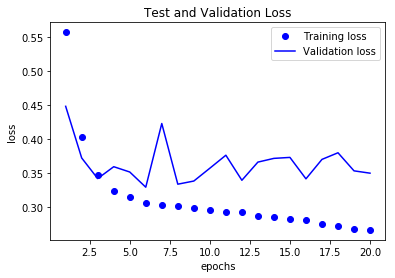

In [37]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,21)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title("Test and Validation Loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

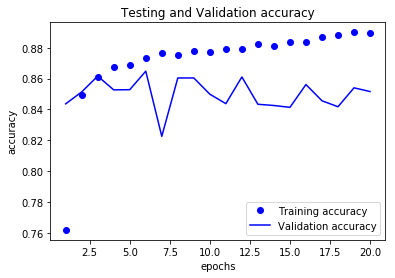

In [39]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training accuracy')
plt.plot(epochs,val_acc_values,'b',label='Validation accuracy')
plt.title("Testing and Validation accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [40]:
model.predict(x_test)

array([[0.23624751],
       [0.99743587],
       [0.4324049 ],
       ...,
       [0.1340265 ],
       [0.07368031],
       [0.5729203 ]], dtype=float32)

In [41]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 6s 224us/step


[0.3523908749771118, 0.84904]